In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Potassium Channel

## A

In [2]:
def alpha_n(v):
    # v in mV
    alpha_ms =  0.01 * (v  + 55) / (1 - np.exp(-0.1 * (v + 55)))
    return alpha_ms

In [3]:
def beta_n(v):
    # v in mV
    beta_ms = 0.125 * np.exp(-0.0125*(v + 65))
    return beta_ms

In [4]:
def potassium_current(v, n, ek=-77, conductance=36e-9):#v in mV
    return conductance * np.power(n,4) * (v + 77)*1e-3

In [5]:
def activation_tc(v):
    return 1. / (alpha_n(v) + beta_n(v))

In [6]:
def ss_activation(v):
    alpha = alpha_n(v) 
    return alpha / (alpha + beta_n(v))

In [7]:
def prob_open_k(x, v):
    return alpha_n(v)*(1-x) - beta_n(v)*x

In [8]:
def euler(f_func, params, init_value, t_max_ms, dt):
    t = np.arange(0,t_max_ms,step=dt)
    x_res = np.zeros(t.shape[0]+1)
    x_res[0] = init_value
    
    vs = np.zeros(t.shape[0])
    if params['is_v_time_dependent']:        
        idx_triggered = t>params['t_trigger']
        vs[idx_triggered] = params['vc']
        vs[~idx_triggered] = params['v_rest']         
    else:
        vs.fill(params['vc'])
    
    for i in range(1, x_res.shape[0]): 
        x_res[i] = x_res[i-1] + f_func(x=x_res[i-1], v=vs[i-1]) * dt
    return x_res[1:], t

## B

In [9]:
voltage_range = np.arange(-150, 150, step=0.1)

In [10]:
activation_tcs = activation_tc(voltage_range)
ss_activations = ss_activation(voltage_range)

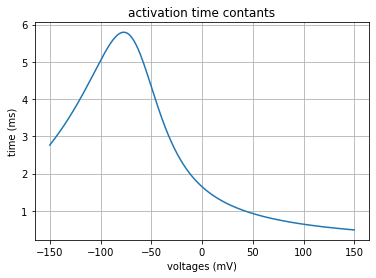

In [11]:
plt.plot(voltage_range, activation_tcs, label='activation time constant')
plt.title('activation time contants')
plt.xlabel('voltages (mV)')
plt.ylabel('time (ms)')
plt.grid()
plt.show()

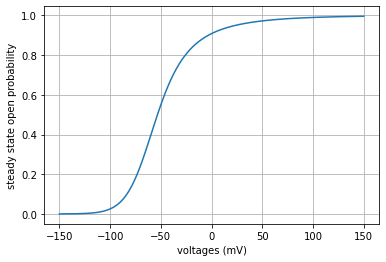

In [12]:
plt.plot(voltage_range, ss_activations, label='steady-state activations')
plt.xlabel('voltages (mV)')
plt.ylabel('steady state open probability')
plt.grid()
plt.show()

In [13]:
params={}
params['vc'] = -40
params['is_v_time_dependent'] = False
res, t = euler(f_func=prob_open_k, params=params, init_value=0.01, t_max_ms=25, dt=1e-3)

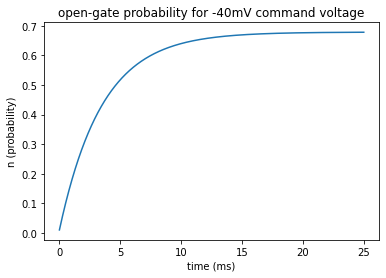

last result = 0.67804718950614
difference between last 2 results = 1.5476952286430645e-07


In [14]:
plt.plot(t,res)
plt.title('open-gate probability for -40mV command voltage')
plt.ylabel('n (probability)')
plt.xlabel('time (ms)')
plt.show()
print('last result = {}'.format(res[-1]))
print('difference between last 2 results = {}'.format(res[-1] -res[-2]))

## C

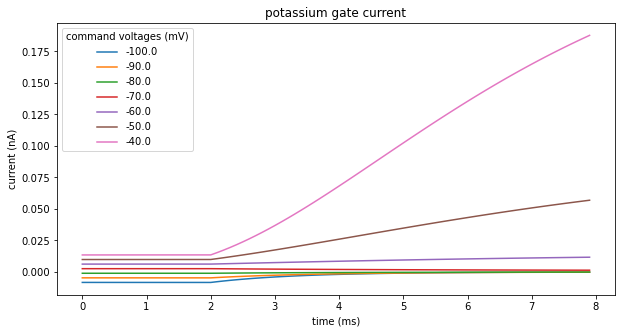

In [15]:
params={}
params['v_rest'] = -65
params['is_v_time_dependent'] = True
params['t_trigger'] = 2

command_voltages = np.linspace(-100, -40, 7).tolist()

results = []
plt.figure(figsize=(10,5))
for volt in command_voltages:
    params['vc'] = volt

    res, t = euler(f_func=prob_open_k, params=params, init_value=0.317, t_max_ms=8, dt=1e-1)

    #axs[0].plot(t,res, label = str(volt))
    
    ik = potassium_current(v=volt, n=res)
    plt.plot(t,ik*1e9, label = str(volt))    
   
plt.title('potassium gate current')
plt.ylabel('current (nA)')
plt.xlabel('time (ms)')
plt.legend(title='command voltages (mV)', loc=2)

plt.show()

## D

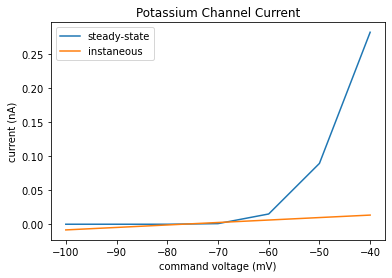

In [16]:
cvs = np.array(command_voltages)
ss_prob = ss_activation(cvs)
ss_i = potassium_current(v= cvs,  n=ss_prob)
inst_i = potassium_current(v = cvs, n = 0.317)
plt.plot(command_voltages, ss_i*1e9, label='steady-state')
plt.plot(command_voltages, inst_i*1e9, label='instaneous')
plt.legend()
plt.title('Potassium Channel Current')
plt.xlabel('command voltage (mV)')
plt.ylabel('current (nA)')
plt.show()

# 2. Sodium Ion Channel

## A

In [17]:
def alpha_m(v):
    return 0.1 * (v+40) / (1-np.exp(-0.1*(v + 40)))

In [18]:
def alpha_h(v):
    return 0.07 * np.exp(-0.05 * (v + 65))

In [19]:
def beta_m(v):
    return 4 * np.exp(-0.0556*(v+65))

In [20]:
def beta_h(v):
    return 1 / (1 + np.exp(-0.1 * (v+35)))

In [21]:
def activation_tc_2(alpha, beta):
    return 1. / (alpha + beta)

In [22]:
def ss_activation_2(alpha, beta): 
    return alpha / (alpha + beta)

In [23]:
def prob_open_m(x, v):
    return alpha_m(v)*(1-x) - beta_m(v)*x

In [24]:
def prob_open_h(x, v):
    return alpha_h(v)*(1-x) - beta_h(v)*x

In [25]:
def sodium_current(v, m, h, e_na=50, conductance=120e-9):
    return conductance*np.power(m,3)*h*(v-e_na)*1e-3

In [26]:
voltage_range = np.arange(-150, 150, step=0.1)
alphas_m = alpha_m(voltage_range)
alphas_h = alpha_h(voltage_range)
betas_m = beta_m(voltage_range)
betas_h = beta_h(voltage_range)

tcs_m = activation_tc_2(alphas_m, betas_m)
tcs_h = activation_tc_2(alphas_h, betas_h)

ss_m = ss_activation_2(alphas_m, betas_m)
ss_h = ss_activation_2(alphas_h, betas_h)

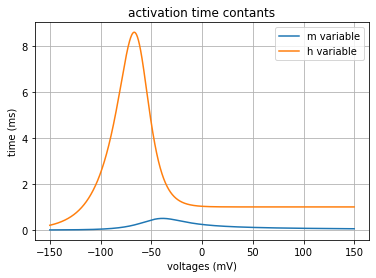

In [27]:
plt.plot(voltage_range, tcs_m, label = 'm variable')
plt.plot(voltage_range, tcs_h, label = 'h variable')
plt.title('activation time contants')
plt.xlabel('voltages (mV)')
plt.ylabel('time (ms)')

plt.legend()
plt.grid()

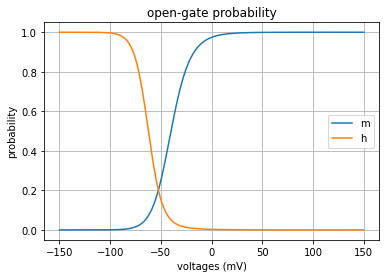

In [28]:
plt.plot(voltage_range, ss_m, label='m')
plt.plot(voltage_range, ss_h, label='h')

plt.title('open-gate probability')
plt.xlabel('voltages (mV)')
plt.ylabel('probability')

plt.legend()
plt.grid()

## B

In [29]:
params={}
params['vc'] = -20
params['is_v_time_dependent'] = False
res_m, t = euler(f_func=prob_open_m, params=params, init_value=0.0529, t_max_ms=15, dt=1e-1)
res_h, _ = euler(f_func=prob_open_h, params=params, init_value=0.5961, t_max_ms=15, dt=1e-1)

sod_i = sodium_current(params['vc'], res_m, res_h)

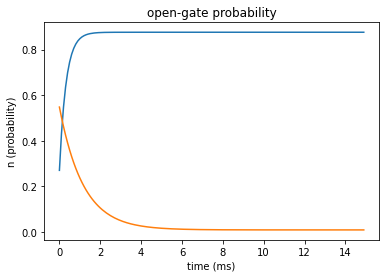

last result = 0.8759110912780017
difference between last 2 results = 0.0


In [30]:
plt.plot(t,res_m, label='m')
plt.plot(t,res_h, label='h')
plt.title('open-gate probability')
plt.ylabel('n (probability)')
plt.xlabel('time (ms)')
plt.show()
print('last result = {}'.format(res_m[-1]))
print('difference between last 2 results = {}'.format(res_m[-1] -res_m[-2]))

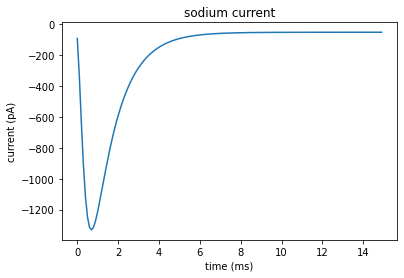

last result = -5.0493572876495704e-11
difference between last 2 results = 7.336392840127161e-16


In [31]:
plt.plot(t, sod_i*1e12, label='sodium')
plt.title('sodium current')
plt.ylabel('current (pA)')
plt.xlabel('time (ms)')
plt.show()
print('last result = {}'.format(sod_i[-1]))
print('difference between last 2 results = {}'.format(sod_i[-1] -sod_i[-2]))


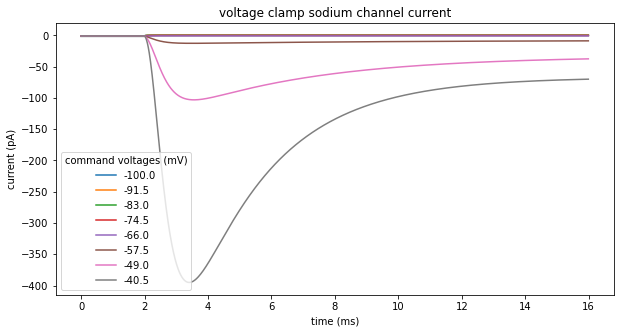

In [32]:
params={}
params['v_rest'] = -65
params['is_v_time_dependent'] = True
params['t_trigger'] = 2

command_voltages = np.linspace(-100, -40.5, 8).tolist()

plt.figure(figsize=(10,5))
for volt in command_voltages:
    params['vc'] = volt
    res_m, t = euler(f_func=prob_open_m, params=params, init_value=0.0529, t_max_ms=16, dt=1e-2)
    res_h, _ = euler(f_func=prob_open_h, params=params, init_value=0.5961, t_max_ms=16, dt=1e-2)

    sod_i = sodium_current(params['vc'], res_m, res_h)
    #axs[0].plot(t,res_m, label = str(volt))
    #axs[0].plot(t,res_h, label = 'h at '+str(volt)+'mV')
    
    plt.plot(t,sod_i*1e12, label = str(volt))    
    
plt.title('voltage clamp sodium channel current')
plt.ylabel('current (pA)')
plt.xlabel('time (ms)')
plt.legend(title='command voltages (mV)', loc=3)

plt.show()

## D

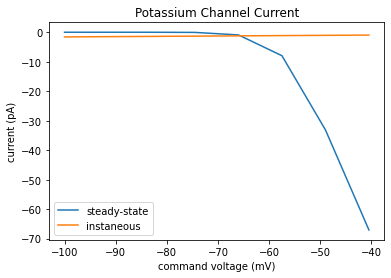

In [33]:
cvs = np.array(command_voltages)

m_ss_prob = ss_activation_2(alpha_m(cvs), beta_m(cvs))
h_ss_prob = ss_activation_2(alpha_h(cvs), beta_h(cvs))

ss_i = sodium_current(cvs, m_ss_prob, h_ss_prob)
inst_i = sodium_current(cvs, 0.0529, 0.5961)
plt.plot(command_voltages, ss_i*1e12, label='steady-state')
plt.plot(command_voltages, inst_i*1e12, label='instaneous')
plt.legend()
plt.title('Potassium Channel Current')
plt.xlabel('command voltage (mV)')
plt.ylabel('current (pA)')
plt.show()

## E

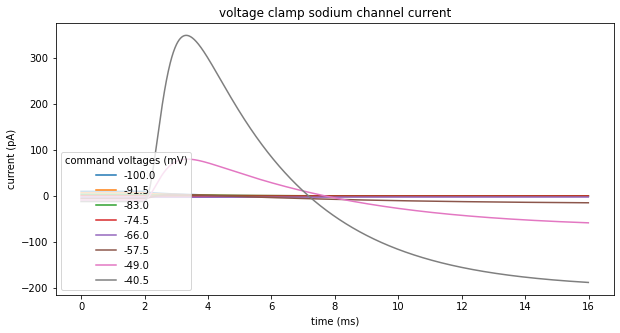

In [39]:
params={}
params['v_rest'] = -65
params['is_v_time_dependent'] = True
params['t_trigger'] = 2

command_voltages = np.linspace(-100, -40.5, 8).tolist()

plt.figure(figsize=(10,5))

max_t = 16
dt = 1e-2

for volt in command_voltages:
    params['vc'] = volt
    res_n, t = euler(f_func=prob_open_k, params=params, init_value=0.317, t_max_ms=max_t, dt=dt)
    res_m, _ = euler(f_func=prob_open_m, params=params, init_value=0.0529, t_max_ms=max_t, dt=dt)
    res_h, _ = euler(f_func=prob_open_h, params=params, init_value=0.5961, t_max_ms=max_t, dt=dt)

    pot_i = potassium_current(params['vc'], res_n)
    sod_i = sodium_current(params['vc'], res_m, res_h)
    
    plt.plot(t,-(pot_i+sod_i)*1e12, label = str(volt))    
    
plt.title('voltage clamp sodium channel current')
plt.ylabel('current (pA)')
plt.xlabel('time (ms)')
plt.legend(title='command voltages (mV)', loc=3)

plt.show()